In [13]:
import numpy as np

In [14]:
def activation(x):
    # Sigmoid function, f(x) = 1/(1+e^-x)
    return 1 / (1 + np.exp(-x))

A neuron takes inputs, does some math with them, and produces one output.

1. Each input is multiplied by a weight:
$$
    x_1 \to x_1 * w_1 \\
    x_2 \to x_2 * w_2
$$

2. Take the sum of the weighted inputs and add a bias:
$$
    (x_1 * w_1) + (x_2 * w_2) + b
$$

3. The final sum is passed through an activation function (sigmoid in this case):
$$
    \text{output} = f(x_1 * w_1 + x_2 * w_2 + b) \\
    \text{output} = \sigma(x_1 * w_1 + x_2 * w_2 + b)
$$

The sigmoid function squishes the sum such that the output is (0,1):
$$
    f(x) = \frac{1}{ 1 + e^{-x} }
$$

In [15]:
class Neuron:
    def __init__(self, weights:list[float], bias:float):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        # Calculates y = (x_n * w) + b
        total = np.dot(self.weights, inputs) + self.bias
        return activation(total)

In [16]:
# w1 = 0, w2 = 1
weights = np.array(
    [0,1]
)

# b = 4
bias = 4

n = Neuron(weights, bias)
# inputs x_1 & x_1 -> Neuron -> output y
x = np.array(
    [2,3]
)

print(n.feedforward(x))

0.9990889488055994


We will implement the following neural network:

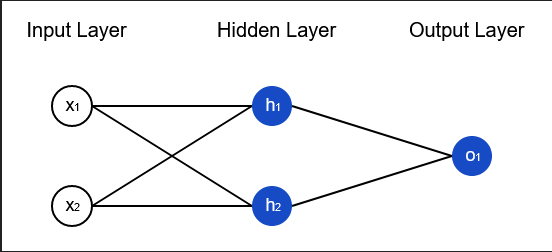

In [17]:
class NeuralNetwork:
    """
    This is a neural network with:
        - 2 inputs
        - 1 hidden layer with 2 neurons (h1, h2)
        - 1 output layer with 1 neuron (o1)
    """
    def __init__(self):
        weights = np.array(
            [0, 1]
        )
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        # The inputs for o1 are the outputs from h1 and h2
        out_hidden_layer = np.array(
            [out_h1, out_h2]
        )
        out_o1 = self.o1.feedforward(out_hidden_layer)

        return out_o1

In [18]:
nn = NeuralNetwork()
x = np.array(
    [2,3]
)
print(nn.feedforward(x))

0.7216325609518421


Now, we will train the neural network to predict someone's gender based on their weight and height:

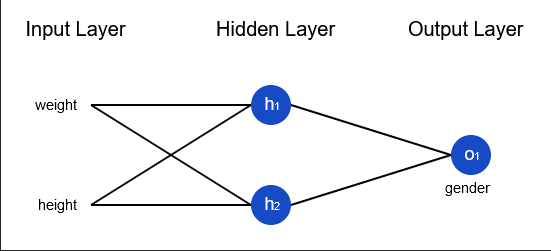

Before training the network, we need to quantify how "good" it's doing.

We can do this by using a Loss function.

We will use the *Mean Square Error* (MSE) Loss:
$$
    \text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_\text{true} - y_\text{predicted})^2
$$

where:
- $n$ is the number of samples
- $y$ represents the variable being predicted
- $y_\text{true}$ is the correct value
- $y_\text{predicted}$ is the predicted value from the network
- $(y_\text{true} - y_\text{predicted})^2$ is the *squared error*. This makes (i) all values positive, and (ii) makes big losses bigger & smaller losses smaller.

By training a network, we aim to minimise its loss.

In [19]:
def loss(y_true:np.ndarray, y_predicted:np.ndarray) -> float:
    # This is an implementation of the Mean Squared Loss Function
    squared_error:np.ndarray = pow((y_true - y_predicted) , 2)
    return squared_error.mean()

y_true = np.array(
    [1,0,0,1]
)
y_predicted = np.array(
    [0,0,0,0]
)

print(loss(y_true, y_predicted))

0.5


Next we will use *backpropagation* to train the neural network.

It is just a bunch of partial derivatives that show you how your output are based on your weights.

Backpropagation allows us to know how much we need to tweak the weights in order to have a more accurate output.

In this case, we will use the *Stochastic Gradient Descent* as our backpropagation algorithm:

$$
    w_1 \leftarrow w_1 - \eta \frac{\partial{L}}{\partial{w_1}}
$$

where $\eta$ is a constant called the *learning rate*. It controls how fast the network is trained.

If $\frac{\partial{L}}{\partial{w_1}} > 0$, $w_1$ decreases, Loss decreases.\
If $\frac{\partial{L}}{\partial{w_1}} < 0$, $w_1$ increases, Loss increases.

Do this for every weight & bias in the network, the loss will decrease and the network will improve.

The training process will be implemented as such:

1. Choose *one* sample from the dataset.
2. Calculate all partial derivatives of loss wrt. weights or biases.
3. Use the updated equation to update each weight and bias.
4. Go back to step 1 until all weights and biases are adjusted.

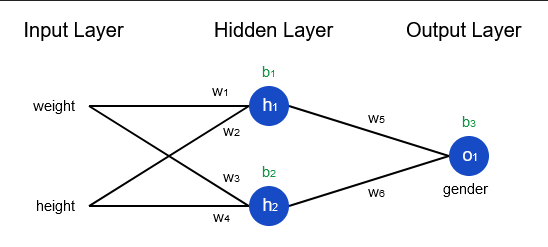

In [20]:
import pandas as pd
data = {
    "Name": ["Alice", "Bob", "Charlie", "Diana", "Emily", "Frank"],
    "Weight": [133, 160, 152, 120, 128, 155],
    "Height": [65, 72, 70, 60, 63, 68],
    "Gender": ['F', 'M', 'M', 'F', 'F', 'M']
}
data = pd.DataFrame(data)
data

,Name,Weight,Height,Gender
0,Alice,133,65,F
1,Bob,160,72,M
2,Charlie,152,70,M
3,Diana,120,60,F
4,Emily,128,63,F
5,Frank,155,68,M


Lets normalise the data and treat $F = 1, M = 0$

In [21]:
def normalise_data(data:pd.DataFrame):
    def gender_number(value):
        if value == "F":
            return 1
        else:
            return 0

    mean_weight = data.Weight.mean()
    mean_height = data.Height.mean()

    norm_weight = data.Weight.map(lambda w: w - mean_weight)
    norm_height = data.Height.map(lambda h: h - mean_height)
    num_gender = data.Gender.apply(gender_number)

    norm_data = {
        "Name": data.Name,
        "Weight": norm_weight,
        "Height": norm_height,
        "Gender": num_gender
    }
    norm_data = pd.DataFrame(norm_data)
    return [norm_data, mean_weight, mean_height]

norm_data = normalise_data(data)
norm_data

[      Name     Weight    Height  Gender
 0    Alice  -8.333333 -1.333333       1
 1      Bob  18.666667  5.666667       0
 2  Charlie  10.666667  3.666667       0
 3    Diana -21.333333 -6.333333       1
 4    Emily -13.333333 -3.333333       1
 5    Frank  13.666667  1.666667       0,
 141.33333333333334,
 66.33333333333333]

In [22]:
import numpy as np

def activation(x:float) -> float:
    # Sigmoid activation function: f(x) = 1/(1+e^-x)
    return 1/(1+np.exp(-x))

def deriv_activation(x:float) -> float:
    # Derivative of sigmoid: f'(x) = f(x) * [1-f(x)]
    f = activation(x)
    return f * (1 - f)

def loss(y_true:np.ndarray, y_pred:np.ndarray) -> float:
    # Mean Squared Loss function: 1/n * sum of all squared errors
    squared_error:np.ndarray = pow((y_true - y_pred), 2)
    return squared_error.mean()

class NeuralNetwork:
    """
    This is a neural network with:
        - 2 inputs
        - 1 hidden layer with 2 neurons
        - 1 output layer with 1 neuron
    """
    def __init__(self, learn_rate, epochs):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

        self.learn_rate = learn_rate
        self.epochs = epochs # number of times to loop through the entire dataset

    def feedforward(self, x:np.ndarray) -> float:
        # There are only two inputs
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = activation(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = activation(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = activation(sum_o1)

        return o1
    
    def train(self, data:np.ndarray, y_trues:np.ndarray):
        """
        - data is a (n x 2) numpy array, n = # of samples in the dataset.
        - all_y_trues is a numpy array with n elements.
        Elements in all_y_trues correspond to those in data.
        """

        for epoch in range(self.epochs):
            for x, y_true in zip(data, y_trues):
                # Do a feedforward to capture the calculated sums
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = activation(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = activation(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = activation(sum_o1)
                y_pred = o1

                # Start backpropagation
                # L = (y_t - y_p)^2, dL/dy_p = -2 * (y_t - y_p)
                partial_L_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                partial_ypred_w5 = h1 * deriv_activation(sum_o1)
                partial_ypred_w6 = h2 * deriv_activation(sum_o1)
                partial_ypred_b3 = deriv_activation(sum_o1)

                partial_ypred_h1 = self.w5 * deriv_activation(sum_o1)
                partial_ypred_h2 = self.w6 * deriv_activation(sum_o1)

                # Neuron h1
                partial_h1_w1 = x[0] * deriv_activation(sum_h1)
                partial_h1_w2 = x[1] * deriv_activation(sum_h1)
                partial_h1_b1 = deriv_activation(sum_h1)

                # Neuron h2
                partial_h2_w3 = x[0] * deriv_activation(sum_h2)
                partial_h2_w4 = x[1] * deriv_activation(sum_h2)
                partial_h2_b2 = deriv_activation(sum_h2)

                # Use Stochastic Gradient descent
                # Neuron h1
                self.w1 -= self.learn_rate * partial_L_ypred * partial_ypred_h1 * partial_h1_w1
                self.w2 -= self.learn_rate * partial_L_ypred * partial_ypred_h1 * partial_h1_w2
                self.b1 -= self.learn_rate * partial_L_ypred * partial_ypred_h1 * partial_h1_b1

                # Neuron h2
                self.w3 -= self.learn_rate * partial_L_ypred * partial_ypred_h2 * partial_h2_w3
                self.w4 -= self.learn_rate * partial_L_ypred * partial_ypred_h2 * partial_h2_w4
                self.b2 -= self.learn_rate * partial_L_ypred * partial_ypred_h2 * partial_h2_b2

                # Neuron o1
                self.w5 -= self.learn_rate * partial_L_ypred * partial_ypred_w5
                self.w6 -= self.learn_rate * partial_L_ypred * partial_ypred_w6
                self.b3 -= self.learn_rate * partial_L_ypred * partial_ypred_b3

            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss_value = loss(y_trues, y_preds)
                print(f"Epoch {epoch}: {loss_value:.3f}")

data = [[w,h] for w,h in zip(norm_data[0].Weight, norm_data[0].Height)]
y_trues = np.array(norm_data[0].Gender)

nn = NeuralNetwork(learn_rate=0.1, epochs=10000)
nn.train(data, y_trues)

Epoch 0: 0.302
Epoch 10: 0.178
Epoch 20: 0.090
Epoch 30: 0.055
Epoch 40: 0.041
Epoch 50: 0.033
Epoch 60: 0.028
Epoch 70: 0.024
Epoch 80: 0.021
Epoch 90: 0.019
Epoch 100: 0.017
Epoch 110: 0.015
Epoch 120: 0.014
Epoch 130: 0.013
Epoch 140: 0.012
Epoch 150: 0.011
Epoch 160: 0.010
Epoch 170: 0.010
Epoch 180: 0.009
Epoch 190: 0.009
Epoch 200: 0.008
Epoch 210: 0.008
Epoch 220: 0.007
Epoch 230: 0.007
Epoch 240: 0.007
Epoch 250: 0.006
Epoch 260: 0.006
Epoch 270: 0.006
Epoch 280: 0.006
Epoch 290: 0.005
Epoch 300: 0.005
Epoch 310: 0.005
Epoch 320: 0.005
Epoch 330: 0.005
Epoch 340: 0.005
Epoch 350: 0.004
Epoch 360: 0.004
Epoch 370: 0.004
Epoch 380: 0.004
Epoch 390: 0.004
Epoch 400: 0.004
Epoch 410: 0.004
Epoch 420: 0.004
Epoch 430: 0.004
Epoch 440: 0.003
Epoch 450: 0.003
Epoch 460: 0.003
Epoch 470: 0.003
Epoch 480: 0.003
Epoch 490: 0.003
Epoch 500: 0.003
Epoch 510: 0.003
Epoch 520: 0.003
Epoch 530: 0.003
Epoch 540: 0.003
Epoch 550: 0.003
Epoch 560: 0.003
Epoch 570: 0.003
Epoch 580: 0.003
Epoch 59

In [23]:
def normalise_predict_data(weight:float, height:float) -> np.ndarray:
    return np.array([weight-norm_data[1], height-norm_data[2]])

barry_w, barry_h = 160.937, 69.2913
barry = normalise_predict_data(barry_w, barry_h)
print(f"Barry: {nn.feedforward(barry)}")

Barry: 0.009324966629086273
